In [2]:
from IPython.display import Image

## 앞서 배운 RNN을 가장 단순한 형태의 RNN이라고 하여 VanillaRNN이라고 한다. 이후 VanillaRNN의 한계를 극복하기 위한 다양한 RNN의 변형이 나왔다. 그 중 하나인 LSTM에 대해 알아본다.

### 1. Limitations of Vanilla RNN

바닐라 RNN은 출력 결과가 이전의 계산 결과에 의존한다. 그런데 비교적 짧은 시퀀스(sequence)에 대해서만 효과를 보이는 단점이 있다. 즉, 바닐라 RNN의 시점(timestep)이 길어질수록 앞의 정보가 뒤로 충분히 전달받지 못하는 현상이 발생하게 된다.  

이를 **장기 의존성 문제**(the problem of Long-Term Dependencies)라고 한다.

### 2. 바닐라 RNN 내부 열어보기

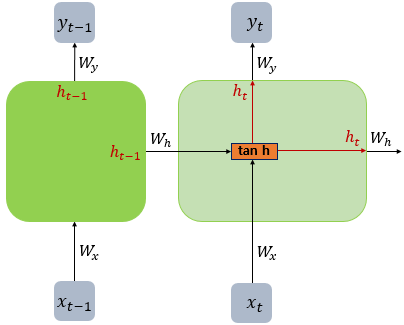

In [3]:
Image("./scr/07-02 vanilla_rnn_ver2.png")

### 3. LSTM(Long Short-Term Memory)

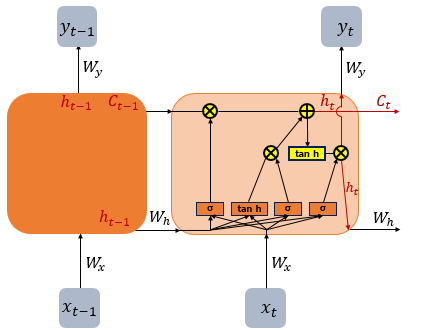

In [5]:
Image("./scr/07-02 vaniila_rnn_and_different_lstm_ver2.png")

LSTM은 은닉층의 메모리 셀에 입력 게이트, 망각 게이트, 출력 게이트를 추가하여 불필요한 기억을 지우고, 기억해야할 것들을 정한다.  
요약하면 LSTM은 은닉 상태(hidden state)를 계산하는 식이 전통적인 RNN보다 복잡하며, cell state라는 것이 추가되었다.
위의 그림에서 t 시점의 셀 상태를 $C_{t}$로 표현하고 있다. LSTM은 RNN과 비교하여 긴 시퀀스의 입력을 처리하는데 탁월한 성능을 보인다.

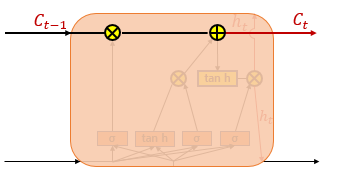

In [3]:
Image("./scr/07-02 cellstate.png")

셀 상태는 위의 그림에서 왼쪽에서 오른쪽으로 가는 굵은 선이다.  
셀 상태 또한 이전에 배운 은닉 상태처럼 이전 시점의 셀 상태가 다음 시점의 셀 상태를 구하기 위한 입력으로서 사용된다.  

은닉 상태값과 셀 상태값을 구하기 위해서 새로 추가 된 3개의 게이트를 사용한다.  
각 게이트는   
삭제 게이트,   
입력 게이트,   
출력 게이트라고 부르며   
이 3개의 게이트에는 공통적으로 시그모이드 함수가 존재한다.  
시그모이드 함수를 지나면 0과 1사이의 값이 나오게 되는데 이 값들을 가지고 게이트를 조절한다. 

아래의 내용을 먼저 논의한 후 각 게이트에 대해서 알아보자.
- 이하 식에서 $\sigma$는 시그모이드 함수를 의미한다.
- 이하 식에서 $tanh$는 하이퍼볼릭탄젠트 함수를 의미한다.
- $W_{xi}, W_{xg}, W_{xf}, W_{xo}$는 $x_{t}$와 함께 각 게이트에서 사용되는 4개의 가중치이다.
- $W_{hi}, W_{hg}, W_{hf}, W_{ho}$는 $h_{t-1}$과 함께 각 게이트에서 사용되는 4개의 가중치이다.
- $b_{i}, b_{g}, b_{f}, b_{o}$는 각 게이트에서 사용되는 4개의 편향이다.

#### 1) 입력 게이트 (input gate)

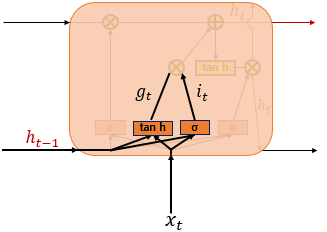

In [4]:
Image("./scr/07-02 inputgate.png")

$i_{t}=σ(W_{xi}x_{t}+W_{hi}h_{t-1}+b_{i})$  
$g_{t}=tanh(W_{xg}x_{t}+W_{hg}h_{t-1}+b_{g})$

입력 게이트는 현재 정보를 기억하기 위한 게이트이다.  
$i_{t}$는 위의 수식에 시그모이드 함수를 지나 나온 0과 1 사이의 값  
$g_{t}$는 하이퍼볼릭탄젠트 함수를 지나 나온 -1과 1 사이의 값

#### 2) 삭제 게이트(forget gate)

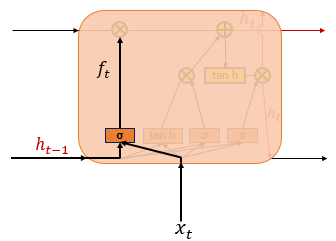

In [5]:
Image("./scr/07-02 forgetgate.png")

$f_{t}=σ(W_{xf}x_{t}+W_{hf}h_{t-1}+b_{f})$

삭제 게이트는 기억을 삭제하기 위한 게이트이다.  
$f_{t}$는 시그모이드 함수를 지나 0과 1 사이의 값이 나온다.  
이 값이 곧 삭제 과정을 거친 정보의 양이다. 
 
0에 가까울수록 정보가 많이 삭제된 것이고,  
1에 가까울수록 정보를 온전히 기억한 것이다.  

#### 3) 셀 상태(장기 상태)

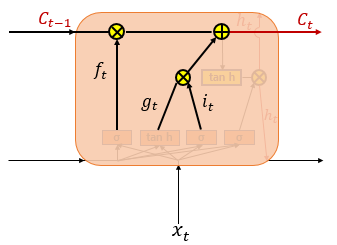

In [12]:
Image("./scr/07-02 cellstate2.png")

$C_{t}=f_{t}∘C_{t-1}+i_{t}∘g_{t}$

입력 게이트에서 구한 $i_{t}, g_{t}$ 이 두 개의 값에 대해서 원소별 곱(entrywise product)을 진행한다. 이것이 이번에 선택된 기억할 값이다.  

입력 게이트에서 선택된 기억(= $i_{t} ∘ g_{t}$)을  
forget gate의 결과값에 이전 시점 셀 상태값의 원소별 곱을 한 $f_{t} ∘ C_{t-1}$과 더한다.  
이 값을 **현재 시점 t의 셀 상태** $C_{t}$라고 하며,   
이 값은 다음 t+1 시점의 LSTM 셀로 넘겨진다.  

이제 삭제 게이트와 입력 게이트의 영향력을 이해해보자.  
삭제 게이트의 출력값인 $f_{t}$가 0이 된다면,  
이전 시점의 셀 상태값인 $C_{t-1}$은 현재 시점의 셀 상태값을 결정하기 위한 영향력이 0이 된다.  
즉 입력 게이트의 결과 (= $i_{t} ∘ g_{t}$)만이 현재 시점의 셀 상태값 $C_{t}$을 결정하게 된다.  
이는 삭제 게이트가 완전히 닫히고, 입력 게이트를 연 상태를 의미한다.  

반대로 입력 게이트 $i_{t}$의 값이 0이 된다면, 현재 시점의 셀 상태값 $C_{t}$은 오직 이전 시점의 셀 상태값 $C_{t-1}$의 값에 의존하게 된다.  
이는 입력 게이트를 완전히 닫고 삭제 게이트만 연 상태를 의미한다.  

결과적으로 
forget gate는 이전 시점의 입력을 얼마나 반영할 것인가,  
input gate는 현재 시점의 입력을 얼마나 반영할 것인가를 결정한다.

#### 4) 출력 게이트와 은닉 상태(단기 상태)

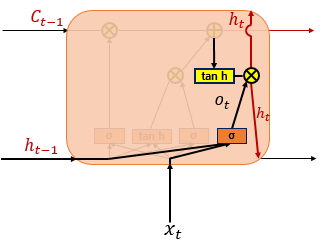

In [13]:
Image("./scr/07-02 outputgateandhiddenstate.png")

$o_{t}=σ(W_{xo}x_{t}+W_{ho}h_{t-1}+b_{o})$  
$h_{t}=o_{t}∘tanh(C_{t})$

출력 게이트는   
현재 시점 t의 x값과     
이전 시점 t-1의 은닉 상태가  
시그모이드 함수를 지난 값이다.  
해당 값은 현재 시점 t의 은닉 상태를 결정하는 일에 쓰이게 된다.  

은닉 상태를 단기 상태라고 하기도 한다.  
은닉 상태는 장기 상태의 값이 하이퍼볼릭탄젠트 함수를 지나 -1과 1사이의 값이다.  
해당 값은 출력 게이트의 값과 연산되면서, 값이 걸러지는 효과가 발생한다.  
단기 상태의 값은 또한 출력층으로도 향한다.  

### 4. 파이토치의 nn.LSTM()

In [ ]:
nn.LSTM(input_dim,hidden_size, batch_first=True)

LSTM 셀은 위와 같이 사용한다.  

### 5. GRU(Gated Recurrent Unit)

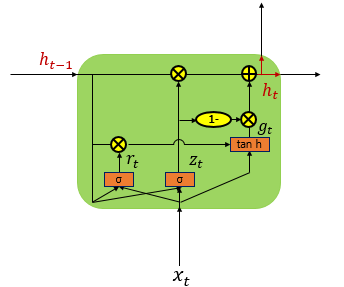

In [14]:
Image("./scr/07-02 gru.png")

LSTM의 대체제이다.
GRU는 2014년 뉴욕대 조경현 교수님이 집필한 논문에서 제안되었다.  
LSTM의 장기 의존성 문제에 대한 해결책을 유지하면서,  
은닉 상태를 업데이트하는 계산을 줄였다.  
즉, 성능은 LSTM과 유사하면서 복잡한 LSTM 구조를 간단화했다.  

GRU는 업데이트 게이트, 리셋 게이트 두 가지 게이트만 존재한다.  
GRU는 LSTM보다 학습 속도가 빠르다고 알려져있지만,  
성능은 유사한 것으로 알려졌다.

$r_{t}=σ(W_{xr}x_{t}+W_{hr}h_{t-1}+b_{r})$  
$z_{t}=σ(W_{xz}x_{t}+W_{hz}h_{t-1}+b_{z})$  
$g_{t}=tanh(W_{hg}(r_{t}∘h_{t-1})+W_{xg}x_{t}+b_{g})$  
$h_{t}=(1-z_{t})∘g_{t}+z_{t}∘h_{t-1}$

경험적으로 데이터 양이 적을 때는 매개 변수의 양이 적은 GRU가 조금 더 낫고,  
데이터 양이 더 많으면 LSTM이 더 낫다고도 한다.  
GRU보다 LSTM에 대한 연구, 사용량이 더 많은데, LSTM이 더 먼저 나온 구조이기 때문이다.  

### 6. 파이토치의 nn.GRU()

파이토치에서 GRU 셀을 사용하는 방법은 간단하다.

In [ ]:
nn.GRU(input_dim, hidden_size, batch_first=True)